In [19]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

data1 = Path("../SQL Extract/project_data.csv")
df = pd.read_csv(data1)
df.head()

data2 = Path("../SQL Extract/project_data_realtime.csv")
df2 = pd.read_csv(data2)
df2.head()

,Date,Index,TA.OVH.RECYCLE.NC4.VOLPCT,RX.TB.RECYCLE.CHARGE.BPD,RX.TB.RECYCLE.CHARGE.PCT,RX.NORTH.TC.CHARGE.BPD,RX.NORTH.TC.CHARGE.CV.PCT,RX.NORTH.FLUSH.PSIG,RX.NORTH.OUT.F,RX.SOUTH.TA.RECYCLE.CHARGE.BPD,...,TC.TRAY7.F,TC.TRAY40.F,TC.CHARGE.F,TC.OVHD.PSIG,TC.OVHD.RECVR.F,TC.TRAY24.F,TC.DP.PSIG,TC.BTM.PSIG,TC.REBOIL.OUT.F,TC.REBOIL.COND.LBHR
0,05-Aug-22 00:00:00,0,14.0,2132.595215,18.0,2711.613037,20.118082,153.740250,103.857941,6491.410156,...,185.167954,197.634384,188.127396,217.592880,164.456192,166.266693,3.765975,221.351303,199.353027,8596.194336
1,04-Aug-22 23:30:00,1,14.0,2143.024414,18.0,2312.922363,14.511842,153.766953,103.287262,6505.625488,...,186.489166,198.926621,190.572861,220.754807,165.982559,168.760483,3.668588,224.383667,200.956726,8440.722656
2,04-Aug-22 23:00:00,2,14.0,2121.799561,18.0,2482.125488,16.785761,155.300140,103.857681,6510.712891,...,186.891327,199.584641,191.436005,222.522293,166.091415,168.856278,3.664014,226.216309,201.646927,8440.021484
3,04-Aug-22 22:30:00,3,14.0,2132.621826,18.0,2117.377930,12.564886,153.994568,103.289803,6495.429199,...,186.982361,199.796036,191.335037,222.607300,166.293076,169.270233,3.678853,226.361267,201.697296,8409.227539
4,04-Aug-22 22:00:00,4,14.0,2122.493896,18.0,2345.685791,15.009791,156.164169,103.927872,6517.029297,...,187.036148,199.854218,191.671753,223.016174,166.722366,169.479752,3.641720,226.658188,201.817337,8357.682617


In [20]:
 ## Separate the Features (X) from the Target (y)
y = df["TA.OVH.RECYCLE.NC4.VOLPCT"]
X = df.drop(["TA.OVH.RECYCLE.NC4.VOLPCT", "Date", "Index"], axis = 1)

## Split into train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
X_train.shape

# Import Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)


,Prediction,Actual
0,10.014080,10.600000
1,9.856864,9.200000
2,10.059915,10.400000
3,13.852045,12.900000
4,14.323265,13.200000
5,14.055454,14.700000
6,13.933272,15.400000
7,10.679582,13.100000
8,17.215157,12.400000
9,12.997188,12.400000


In [21]:
# Run "real time" data in model
y2 = df2["TA.OVH.RECYCLE.NC4.VOLPCT"]
X2 = df2.drop(["TA.OVH.RECYCLE.NC4.VOLPCT", "Date", "Index"], axis = 1)

# Make Predictions on "real time" data frame
y_pred2 = model.predict(X2)
results2 = pd.DataFrame({"Prediction": y_pred2, "Actual": y2}).reset_index(drop=True)
results2.head(10)
df2["Predictions"]=y_pred2
df2.head()
# Save to csv
df2.to_csv('project_data_realtime_withPredictions.csv', index=False)


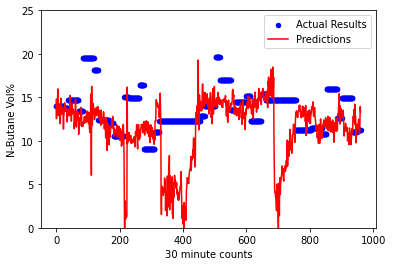

In [22]:
# Plot "Real Time" results2
# Plot
ax = df2.plot(kind="scatter", x="Index",y="TA.OVH.RECYCLE.NC4.VOLPCT", color="b", label="Actual Results")
df2.plot(x="Index",y="Predictions", color="r", label="Predictions", ax=ax)
ax.set_xlabel("30 minute counts")
ax.set_ylabel("N-Butane Vol%")
ax.set_ylim(0,25)
plt.show()

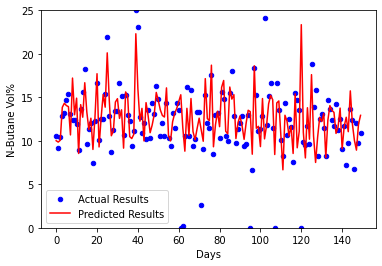

In [23]:
# Plot Results
# Create X-Axis for y
plot_df=pd.DataFrame(results)
count = []
i=0
for value in plot_df['Actual']:
    count.append(i)
    i=i+1
plot_df["Count"] = count  
plot_df.head()
plot_df["Actual"] = pd.to_numeric(plot_df["Actual"])
plot_df.dtypes
df = plot_df.head(150)

# Plot
ax = df.plot(kind="scatter", x="Count",y="Actual", color="b", label="Actual Results")
df.plot(x="Count",y="Prediction", color="r", label="Predicted Results", ax=ax)


ax.set_xlabel("Days")
ax.set_ylabel("N-Butane Vol%")
ax.set_ylim(0,25)
plt.show()


In [24]:
results_df = pd.DataFrame(results)
variation = abs(results_df["Actual"] - results_df["Prediction"])
results_df['Variation Vol%']=variation
total_variation = results_df['Variation Vol%'].mean()

accuracy = (results_df["Actual"].astype(float)/results_df["Prediction"].astype(float))*100
results_df['Accuracy']=accuracy
total_accuracy = results_df['Accuracy'].astype(float).mean()

# total_accuracy
print(" The average variation is " ,total_variation, "Vol% Points, the average accuracy is " ,total_accuracy, "%")

 The average variation is  1.9177693823501651 Vol% Points, the average accuracy is  99.43974573707439 %


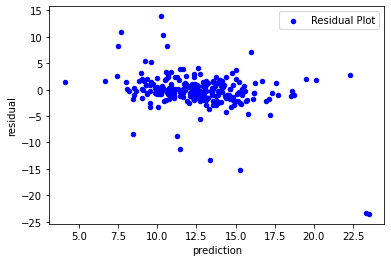

In [5]:
# Residual plots — Before evaluation of a model

# We know that linear regression tries to fit a line that produces the smallest difference between predicted and actual values, 
# where these differences are unbiased as well. This difference or error is also known as residual. 
# (Unbiased means there is no systematic pattern of distribution of the predicted values)

# Residual = actual value — predicted value
residual = results_df["Actual"] - results_df["Prediction"]
prediction = results_df["Prediction"]
residual_df = pd.DataFrame(residual, columns=['residual'])
residual_df['prediction']=prediction.to_list()
residual_df
# Residual plots show the residual values on the y-axis and predicted values on the x-axis. If your model is biased you cannot trust the results.
residual_df.plot(kind="scatter", x="prediction",y="residual", color="b", label="Residual Plot")
plt.show()
# But what does it mean by randomly distributed errors?
# One of the assumptions of a linear regression model is that the errors must be normally distributed. 
# This means, make sure your residuals are distributed around zero for the entire range of predicted values. 
# Thus, if the residuals are evenly scattered, then your model may perform well.

In [6]:
# Mean Squared Error (MSE)
# The most common metric for regression tasks is MSE. It has a convex shape. 
# It is the average of the squared difference between the predicted and actual value. 
# Since it is differentiable and has a convex shape, it is easier to optimize.
MSE = (results_df["Prediction"] - results_df["Actual"])**2
results_df['MSE']= MSE
Total_MSE = results_df['MSE'].mean()
print(" The total Mean Squared Error  is " , Total_MSE)

 The total Mean Squared Error  is  12.382703505204093


In [7]:
# Mean Absolute Error (MAE)
# This is simply the average of the absolute difference between the target value and the value predicted by the model. 
# Not preferred in cases where outliers are prominent.
MAE = abs(results_df["Prediction"] - results_df["Actual"])
results_df['MAE']= MAE
Total_MAE = results_df['MAE'].mean()
print(" The total Mean Absolute Error  is " , Total_MAE)

 The total Mean Absolute Error  is  1.9177693823501651


In [8]:
# Root Mean Squared Error (RMSE)
# This is the square root of the average of the squared difference of the predicted and actual value.
# Basically, RMSE is just the root of the average of squared residuals. 
# We know that residuals are a measure of how distant the points are from the regression line. Thus, RMSE measures the scatter of these residuals.
Total_RMSE = (Total_MSE)**(1/2)
print(" The total Root Mean Squared Error is " , Total_RMSE)

 The total Root Mean Squared Error is  3.51890657807281
